Домашнее задание №1 (32)

Исполнитель: Азизов Мухаммад

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px

In [ ]:
from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL

In [ ]:
connection_url = URL.create(
    drivername="postgresql+psycopg2",
    username="postgres",
    password="1265",  
    host="localhost",
    port=5432,
)

In [5]:
engine = create_engine(connection_url)
conn = engine.connect()

print("Успешное подключение к PostgreSQL!")

Успешное подключение к PostgreSQL!


In [9]:
query = "Select * from track;"

In [10]:
df = pd.read_sql(query, conn)

Задача №1
На основе данных из таблицы track создайте столбчатую диаграмму, показывающую общую сумму минут (длительность треков) в разбивке по жанрам.

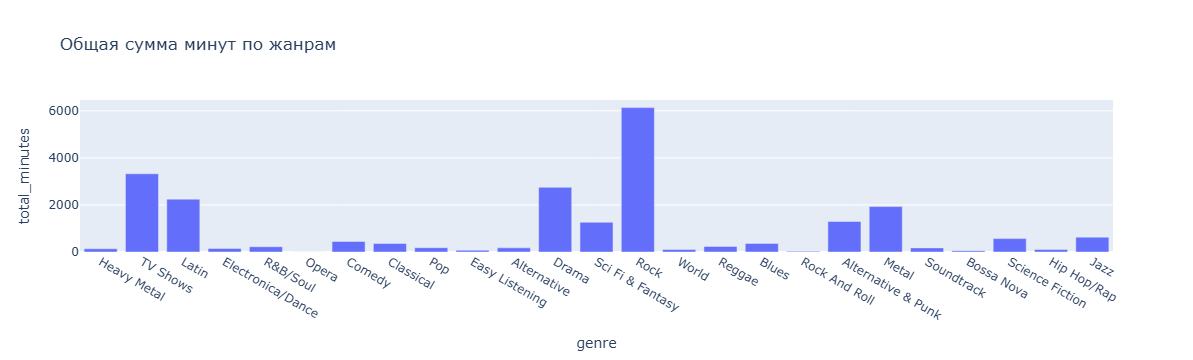

In [11]:
query_1 = """
select 
    g.name as genre 
    , sum(t.milliseconds) / 60000. as total_minutes
from track t
join genre g 
    on t.genre_id = g.genre_id
group by 
    g.name
"""

df_1 = pd.read_sql_query(query_1, conn)
fig_1 = px.bar(
    df_1, 
    x = 'genre', 
    y = 'total_minutes',
    title = 'Общая сумма минут по жанрам'
)
fig_1.show()

Задача №2
На основе данных из таблицы track создайте диаграмму рассеивания, показывающую соотношение минут и мегабайтов.

In [31]:
df = pd.read_sql(query_2, conn)

In [32]:
print(df.head())

                                track_name  duration_minutes    size_mb
0  For Those About To Rock (We Salute You)          5.728650  10.652861
1                        Balls to the Wall          5.709367   5.255150
2                          Fast As a Shark          3.843650   3.806108
3                        Restless and Wild          4.200850   4.131106
4                     Princess of the Dawn          6.256967   5.999108


In [33]:
query_2= """
select t.name as track_name, 
       t.milliseconds / 60000.0 as duration_minutes, 
       t.bytes / 1048576.0 as size_mb
from track t
where t.milliseconds > 0 and t.bytes > 0;
"""
fig = px.scatter(df, 
                 x="duration_minutes", 
                 y="size_mb", 
                 title="Соотношение минут и мегабайтов для треков",
                 labels={"duration_minutes": "Длительность (минуты)", "size_mb": "Размер (МБ)"},
                 hover_data=["track_name"],  
                 color="size_mb",  
                 color_continuous_scale="Viridis" 
                )

fig.show()


Задача №3 На основе данных из таблицы invoice создайте коробчатую диаграмму, показывающую распределение дохода (поле total) в разбивке по странам.

In [34]:
df = pd.read_sql(query_3, conn)

In [35]:
query_3 = """
select i.billing_country, i.total
from invoice i
where i.total > 0
"""

fig = px.box(df, 
             x="billing_country", 
             y="total", 
             title="Распределение дохода по странам",
             labels={"billing_country": "Страна", "total": "Доход"},
             boxmode="group" 
            )

fig.show()

Задача №4 
На основе данных из таблицы invoice создайте линейчатую диаграмму, показывающую изменение дохода по месяцам за 2025 год.


In [37]:
df = pd.read_sql(query_4, conn)

In [40]:
query_4 = """
select i.invoice_date, i.total
from invoice i
where i.invoice_date >= '2025-01-01' AND i.invoice_date < '2026-01-01'
"""

df['invoice_date'] = pd.to_datetime(df['invoice_date'])

df['year_month'] = df['invoice_date'].dt.to_period('M').astype(str)

monthly_revenue = df.groupby('year_month')['total'].sum().reset_index()

In [41]:
fig = px.line(monthly_revenue, 
              x="year_month", 
              y="total", 
              title="Изменение дохода по месяцам за 2025 год",
              labels={"year_month": "Месяц", "total": "Доход"},
              markers=True)

fig.show()

Задача №5 
На основе данных из таблицы invoice, создайте круговую диаграмму, показывающую соотношение продаж в США и в остальном мире. Т.е. ваша круговая диаграмма должна состоять лишь из двух секций: США и остальной мир.

In [43]:
df = pd.read_sql(query_5, conn)

In [44]:
query_5 = """
select i.billing_country, i.total
from invoice i
where i.billing_country IN ('USA', 'Canada') 
"""
df['country_category'] = df['billing_country'].apply(lambda x: 'USA' if x == 'USA' else 'Остальной мир')

sales_by_country = df.groupby('country_category')['total'].sum().reset_index()


In [45]:
fig = px.pie(sales_by_country, 
             names='country_category', 
             values='total', 
             title="Соотношение продаж в США и остальном мире",
             labels={"country_category": "Страна", "total": "Доход"})

fig.show()